# Backtesting RSI-strategy learned from Rayner Teo
Rayner Teo presents [in his Youtube -video](https://www.youtube.com/watch?v=W8ENIXvcGlQ&list=PLT6_Bt_TKitKDFdvmvnuerv8T6zG5qW3h&index=19) trading strategy that has a very high winning rate. He says that he have learned the strategy from Larry Connors.

Strategy is this:

**Enter** the next day open when
*   the close price is above 200SMA and
*   10-period RSI below 30

**Exit** the next say open when

*   the 10-period RSI is above 40 or
*   10 traiding days have passed


I am going to test that strategy for SP500.


## Setting up environment and getting data

In [3]:
!pip install yfinance

     |████████████████████████████████| 6.3MB 4.3MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.59-py2.py3-none-any.whl size=23442 sha256=9467b3a4726d56eb983551614183bafb8c5d884cfd3768b75510802008e9a090
  Stored in directory: /root/.cache/pip/wheels/f8/2a/0f/4b5a86e1d52e451757eb6bc17fd899629f0925c777741b6d04
Successfully built yfinance
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [1]:
import yfinance as yf
import pandas as pd

In [2]:
data = yf.download('^GSPC', start='1996-01-01', end='2021-05-01')

[*********************100%***********************]  1 of 1 completed


In [3]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1996-01-02,615.929993,620.739990,613.169983,620.729980,620.729980,364180000
1996-01-03,620.729980,623.250000,619.559998,621.320007,621.320007,468950000
1996-01-04,621.320007,624.489990,613.960022,617.700012,617.700012,512580000
1996-01-05,617.700012,617.700012,612.020020,616.710022,616.710022,437110000
1996-01-08,616.710022,618.460022,616.489990,618.460022,618.460022,130360000
...,...,...,...,...,...,...
2021-04-26,4185.029785,4194.189941,4182.359863,4187.620117,4187.620117,3738920000
2021-04-27,4188.250000,4193.350098,4176.220215,4186.720215,4186.720215,3703240000
2021-04-28,4185.140137,4201.529785,4181.779785,4183.180176,4183.180176,3772390000


## Calculating 200MA

In [4]:
data['200MA'] = data['Adj Close'].rolling(window=200).mean() 

In [5]:
data

,Open,High,Low,Close,Adj Close,Volume,200MA
Date,,,,,,,
1996-01-02,615.929993,620.739990,613.169983,620.729980,620.729980,364180000,NaN
1996-01-03,620.729980,623.250000,619.559998,621.320007,621.320007,468950000,NaN
1996-01-04,621.320007,624.489990,613.960022,617.700012,617.700012,512580000,NaN
1996-01-05,617.700012,617.700012,612.020020,616.710022,616.710022,437110000,NaN
1996-01-08,616.710022,618.460022,616.489990,618.460022,618.460022,130360000,NaN
...,...,...,...,...,...,...,...
2021-04-26,4185.029785,4194.189941,4182.359863,4187.620117,4187.620117,3738920000,3635.374154
2021-04-27,4188.250000,4193.350098,4176.220215,4186.720215,4186.720215,3703240000,3640.382555
2021-04-28,4185.140137,4201.529785,4181.779785,4183.180176,4183.180176,3772390000,3645.522356


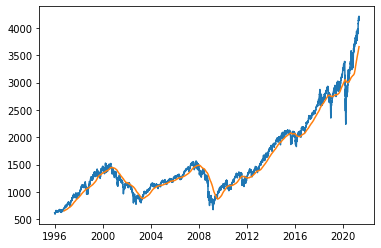

In [6]:
import matplotlib.pyplot as plt

plt.plot(data['Adj Close'])
plt.plot(data['200MA'])

## Calculations for RSI
Calculation is a little bit tricky. Here is used instructions found from [https://www.macroption.com/rsi-calculation/](https://www.macroption.com/rsi-calculation/).

In [7]:
# daily returns
data['Price change'] = data['Adj Close'].pct_change()

In [8]:
data['Upmove'] = data['Price change'].apply(lambda x: x if x > 0 else 0)
data['Downmove'] = data['Price change'].apply(lambda x: abs(x) if x < 0 else 0)

In [9]:
# Averiging the Advances and Declines. Here we use Wilder’s Smoothing Method with N=10
data['Avg Up']=data['Upmove'].ewm(alpha=0.1).mean()
data['Avg Down']=data['Downmove'].ewm(alpha=0.1).mean()

In [10]:
data

,Open,High,Low,Close,Adj Close,Volume,200MA,Price change,Upmove,Downmove,Avg Up,Avg Down
Date,,,,,,,,,,,,
1996-01-02,615.929993,620.739990,613.169983,620.729980,620.729980,364180000,NaN,NaN,0.000000,0.000000,0.000000,0.000000
1996-01-03,620.729980,623.250000,619.559998,621.320007,621.320007,468950000,NaN,0.000951,0.000951,0.000000,0.000500,0.000000
1996-01-04,621.320007,624.489990,613.960022,617.700012,617.700012,512580000,NaN,-0.005826,0.000000,0.005826,0.000316,0.002150
1996-01-05,617.700012,617.700012,612.020020,616.710022,616.710022,437110000,NaN,-0.001603,0.000000,0.001603,0.000224,0.001991
1996-01-08,616.710022,618.460022,616.489990,618.460022,618.460022,130360000,NaN,0.002838,0.002838,0.000000,0.000862,0.001505
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-26,4185.029785,4194.189941,4182.359863,4187.620117,4187.620117,3738920000,3635.374154,0.001782,0.001782,0.000000,0.004265,0.002150
2021-04-27,4188.250000,4193.350098,4176.220215,4186.720215,4186.720215,3703240000,3640.382555,-0.000215,0.000000,0.000215,0.003839,0.001956
2021-04-28,4185.140137,4201.529785,4181.779785,4183.180176,4183.180176,3772390000,3645.522356,-0.000846,0.000000,0.000846,0.003455,0.001845


In [11]:
data['RSI10']=100 - 100 /(1+data['Avg Up']/data['Avg Down'])

In [12]:
data

,Open,High,Low,Close,Adj Close,Volume,200MA,Price change,Upmove,Downmove,Avg Up,Avg Down,RSI10
Date,,,,,,,,,,,,,
1996-01-02,615.929993,620.739990,613.169983,620.729980,620.729980,364180000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN
1996-01-03,620.729980,623.250000,619.559998,621.320007,621.320007,468950000,NaN,0.000951,0.000951,0.000000,0.000500,0.000000,100.000000
1996-01-04,621.320007,624.489990,613.960022,617.700012,617.700012,512580000,NaN,-0.005826,0.000000,0.005826,0.000316,0.002150,12.803224
1996-01-05,617.700012,617.700012,612.020020,616.710022,616.710022,437110000,NaN,-0.001603,0.000000,0.001603,0.000224,0.001991,10.109034
1996-01-08,616.710022,618.460022,616.489990,618.460022,618.460022,130360000,NaN,0.002838,0.002838,0.000000,0.000862,0.001505,36.426593
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-26,4185.029785,4194.189941,4182.359863,4187.620117,4187.620117,3738920000,3635.374154,0.001782,0.001782,0.000000,0.004265,0.002150,66.489310
2021-04-27,4188.250000,4193.350098,4176.220215,4186.720215,4186.720215,3703240000,3640.382555,-0.000215,0.000000,0.000215,0.003839,0.001956,66.242731
2021-04-28,4185.140137,4201.529785,4181.779785,4183.180176,4183.180176,3772390000,3645.522356,-0.000846,0.000000,0.000846,0.003455,0.001845,65.185864


In [13]:
data.dropna(inplace=True)

## Applying the strategy

In [15]:
data.loc[(data['Adj Close'] > data['200MA']) & (data['RSI10'] < 30), 'Buy'] = 'Yes'
data.loc[(data['Adj Close'] < data['200MA']) | (data['RSI10'] > 30), 'Buy'] = 'No'


In [16]:
# Making a list of profits and losses. Entry is profit/loss made by buyig a one unit.
PnL = []
for i in range(len(data)-12):
  if 'Yes' in data['Buy'].iloc[i]:
    for j in range(1,11):
      if data['RSI10'].iloc[i+j]>40:
        PnL.append(data['Open'].iloc[i+j+1]-data['Open'].iloc[i+1])
        break
      elif j == 10:
        PnL.append(data['Open'].iloc[i+j+1]-data['Open'].iloc[i+1])
      else:
        pass
  else:
    pass

In [17]:
wins = len([i for i in PnL if i > 0])
wins

70

In [18]:
trades = len(PnL)
trades

73

In [21]:
print("The winning rate is: ", wins/trades*100, "%")

The winning rate is:  95.8904109589041 %


In [23]:
print("The total profit: ", sum(PnL), 'USD')

The total profit:  1467.268798828125 USD


So the winning rate is very high (wow!) but the are some drawbacks in this strategy. 

1.   During about 25 year period there is only 73 trades total. So these occur quite rarely.
2.   Buy buying one unit the gain is quite small for 25 year, just about 2500 USD. Buy and hold would have given bigger profits.
3.   To better use this strategy, the position size should be somehow decided to be reasonable and there should be somekind of stop loss.
